### Now , I will use clean bank data to make model.

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/Users/kanchansingh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
pd.set_option('display.max_rows', 999)

In [4]:
bank_model=pd.read_csv('/Users/kanchansingh/git project/Bank_propensity_model/clean_data.csv')

In [5]:
bank_model.head()

,age,education,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,y
0,9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent,no
1,9,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent,no
2,5,3,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent,no
3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent,no
4,9,3,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,nonexistent,no


In [6]:
bank_model[0:].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,40689,40690,40691,40692,40693,40694,40695,40696,40697,40698,40699,40700,40701,40702,40703,40704,40705,40706,40707,40708,40709,40710,40711,40712,40713,40714,40715,40716,40717,40718,40719,40720,40721,40722,40723,40724,40725,40726,40727,40728,40729,40730,40731,40732,40733,40734,40735,40736,40737,40738,40739,40740,40741,40742,40743,40744,40745,40746,40747,40748,40749,40750,40751,40752,40753,40754,40755,40756,40757,40758,40759,40760,40761,40762,40763,40764,40765,40766,40767,40768,40769,40770,40771,40772,40773,40774,40775,40776,40777,40778,40779,40780,40781,40782,40783,40784,40785,40786,40787,40788,40789,40790,40791,40792,40793,40794,40795,40796,40797,40798,40799,40800,40801,40802,40803,40804,40805,40806,40807,40808,40809,40810,40811,40812,40813,40814,40815,40816,40817,40818,40819,40820,40821,40822,40823,40824,40825,40826,40827,40828,40829,40830,40831,40832,40833,40834,40835,40836,40837,40838,40839,40840,40841,40842,40843,40844,40845,40846,40847,40848,40849,40850,40851,40852,40853,40854,40855,40856,40857,40858,40859,40860,40861,40862,40863,40864,40865,40866,40867,40868,40869,40870,40871,40872,40873,40874,40875,40876,40877,40878,40879,40880,40881,40882,40883,40884,40885,40886,40887,40888,40889,40890,40891,40892,40893,40894,40895,40896,40897,40898,40899,40900,40901,40902,40903,40904,40905,40906,40907,40908,40909,40910,40911,40912,40913,40914,40915,40916,40917,40918,40919,40920,40921,40922,40923,40924,40925,40926,40927,40928,40929,40930,40931,40932,40933,40934,40935,40936,40937,40938,40939,40940,40941,40942,40943,40944,40945,40946,40947,40948,40949,40950,40951,40952,40953,40954,40955,40956,40957,40958,40959,40960,40961,40962,40963,40964,40965,40966,40967,40968,40969,40970,40971,40972,40973,40974,40975,40976,40977,40978,40979,40980,40981,40982,40983,40984,40985,40986,40987,40988,40989,40990,40991,40992,40993,40994,40995,40996,40997,40998,40999,41000,41001,41002,41003,41004,41005,41006,41007,41008,41009,41010,41011,41012,41013,41014,41015,41016,41017,41018,41019,41020,41021,41022,41023,41024,41025,41026,41027,41028,41029,41030,41031,41032,41033,41034,41035,41036,41037,41038,41039,410

In [7]:
bank_model.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'contact', 'month', 'day_of_week', 'duration',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
del bank_model['poutcome']

In [9]:
y = pd.get_dummies(bank_model['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [10]:
feat=bank_model.drop(columns=['y'],axis=1)
label=bank_model['y']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.3, random_state = 103)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [12]:
X_train.head()

,age,education,default,housing,loan,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous
9927,8,7,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,4,4,2,1.4,94.465,-41.8,4.959,5228.1,1,999,0
20306,5,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,4,1.4,93.444,-36.1,4.965,5228.1,3,999,0
29042,4,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,-1.8,93.075,-47.1,1.405,5099.1,2,999,0
564,4,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,3,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0
2341,8,5,1,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,6,3,2,1.1,93.994,-36.4,4.856,5191.0,1,999,0


In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10736   233]
 [  831   557]]
91.0


ValueError: Data is not binary and pos_label is not specified

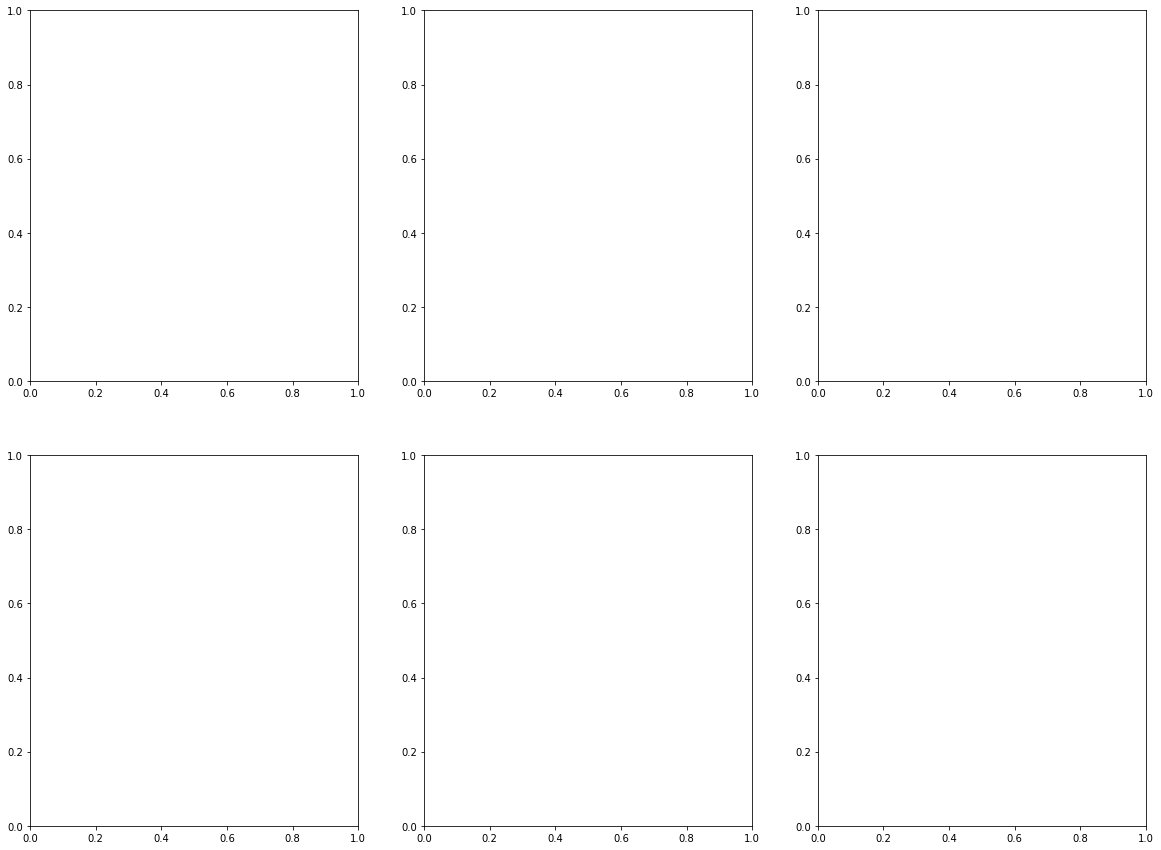

In [36]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


k=1 87.88 (+/- 0.47)
k=2 89.64 (+/- 0.21)
k=3 89.45 (+/- 0.17)
k=4 89.96 (+/- 0.34)
k=5 89.95 (+/- 0.21)
k=6 90.12 (+/- 0.36)
k=7 90.19 (+/- 0.32)
k=8 90.30 (+/- 0.38)
k=9 90.35 (+/- 0.33)
k=10 90.29 (+/- 0.28)
The optimal number of neighbors is 8 with 90.3%


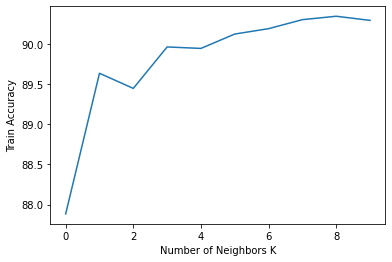

In [99]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(feat,label, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,10)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=5, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10835   134]
 [ 1045   343]]
90.0


In [101]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10234   735]
 [  833   555]]
87.0


In [102]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10252   717]
 [  708   680]]
88.0


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10591   378]
 [  682   706]]
91.0


In [21]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[9848 1121]
 [ 599  789]]
86.0


In [26]:
#pip install xgboost


In [27]:
#from xgboost import XGBClassifier
#xgb = XGBClassifier()
#xgb.fit(X_train, y_train)
#xgbprd = xgb.predict(X_test)

#print(confusion_matrix(y_test, xgbprd ))
#print(round(accuracy_score(y_test, xgbprd),2)*100)
#XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[10573   396]
 [  678   710]]
91.0


In [34]:
from sklearn.metrics import classification_report

In [35]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

NameError: name 'knnpred' is not defined

In [28]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)


NameError: name 'RFCCV' is not defined

Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

ValueError: not enough values to unpack (expected 5, got 2)

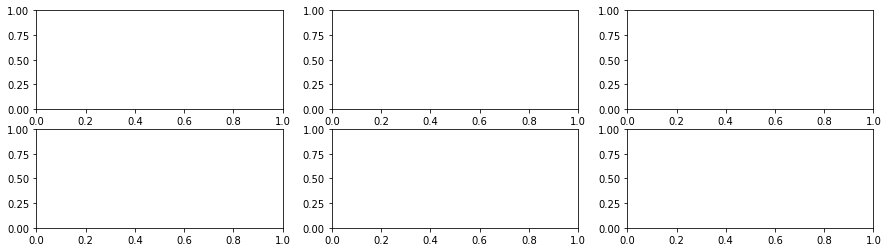

In [32]:

from sklearn import metrics
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})